In [29]:
import pandas as pd 

data = pd.read_csv('CD-EAFC26-Men.csv')

X = data.drop(columns='OVR')
Y = data['OVR']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=44)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Text(0.5, 1.0, 'Data after Scaling')

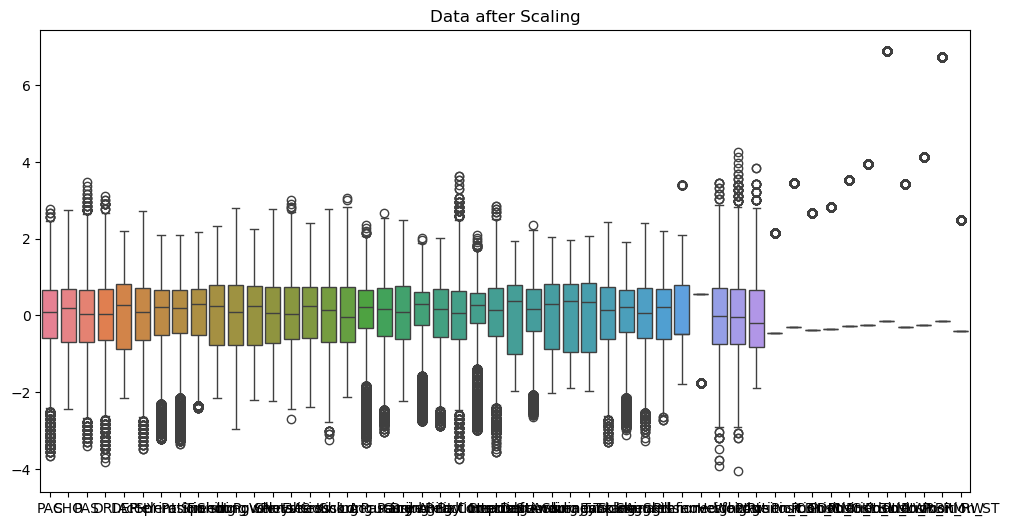

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


data_scale = pd.DataFrame(x_train, columns=x_train.columns if hasattr(x_train, 'columns') else X.columns)

plt.figure(figsize=(12,6))
sns.boxplot(data=data_scale)
plt.title("Data after Scaling")


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors = 10) 

model.fit(x_train , y_train)

y_pridect = model.predict(x_test)

In [33]:
mseKNN = mean_squared_error(y_test, y_pridect)
r2 = r2_score(y_test, y_pridect)

print("MSE:", mseKNN)
print("R²:", r2)


MSE: 2.878555144793592
R²: 0.9372673171961028


Text(0.5, 1.0, 'Actual vs Predicted (KNN Regression)')

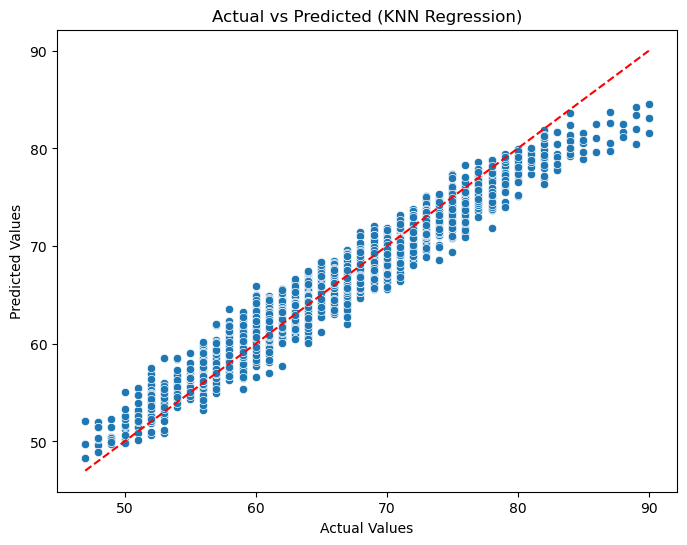

In [34]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pridect)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (KNN Regression)")

Text(0.5, 1.0, 'Residuals Plot (KNN Regression)')

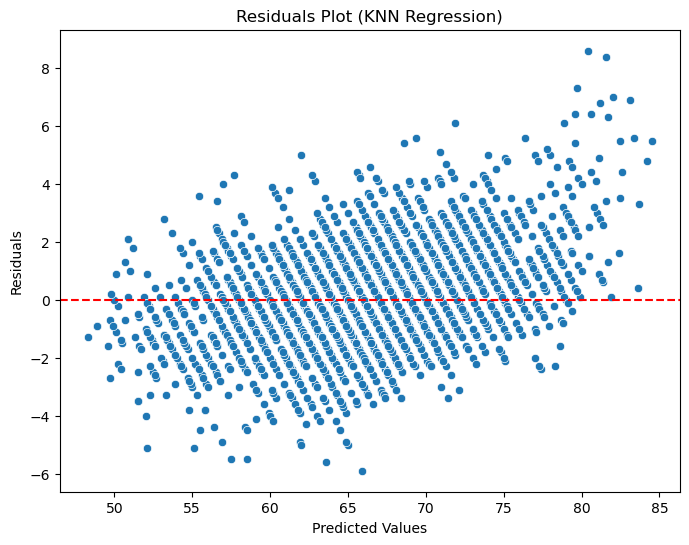

In [35]:
residuals = y_test - y_pridect

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pridect, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (KNN Regression)")

In [36]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(x_train,y_train)
y_pred = Linear_model.predict(x_test)

In [37]:
mseLinearReg = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mseLinearReg)
print("R²:", r2)

MSE: 3.1298995535186696
R²: 0.931789739635846


Text(0.5, 1.0, 'Actual vs Predicted (Linear Regression)')

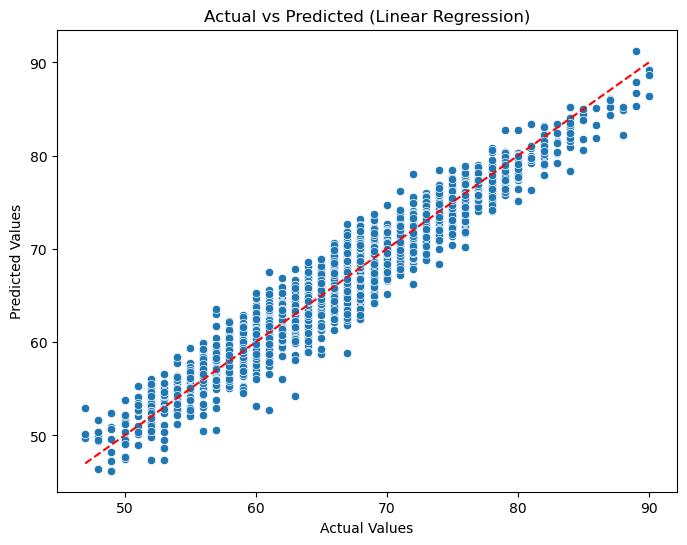

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")

Text(0.5, 1.0, 'Residuals Plot (Linear Regression)')

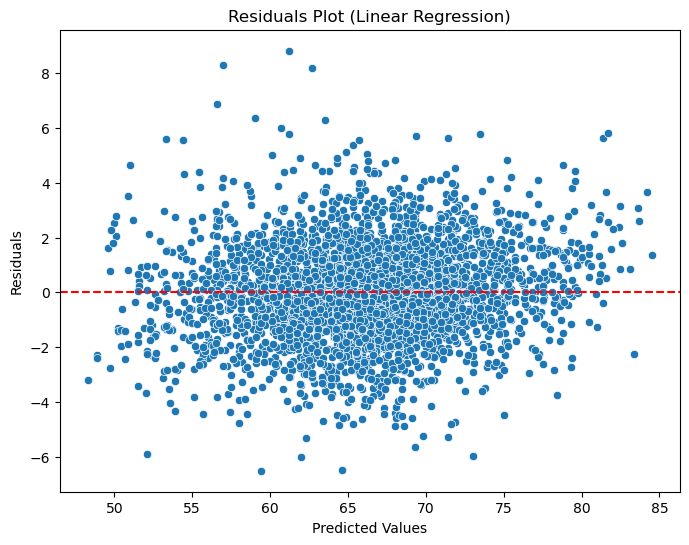

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pridect, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Linear Regression)")